In [1304]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [1305]:
df=pd.read_csv("HINDUNILVR.csv",index_col='Date',parse_dates=True)

In [1306]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HINDLEVER,EQ,2136.60,2300.0,2307.55,2300.00,2307.55,2307.55,2307.08,24903,5.745330e+12,NaN,NaN,NaN
2000-01-04,HINDLEVER,EQ,2307.55,2381.0,2381.00,2250.00,2270.00,2281.05,2298.15,58514,1.344740e+13,NaN,NaN,NaN
2000-01-05,HINDLEVER,EQ,2281.05,2200.0,2250.00,2105.00,2183.50,2199.90,2211.17,80296,1.775482e+13,NaN,NaN,NaN
2000-01-06,HINDLEVER,EQ,2199.90,2224.9,2360.00,2210.00,2300.00,2288.20,2301.80,190032,4.374157e+13,NaN,NaN,NaN
2000-01-07,HINDLEVER,EQ,2288.20,2300.0,2452.00,2282.25,2395.00,2412.95,2380.24,192582,4.583919e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,HINDUNILVR,EQ,2307.75,2324.0,2369.80,2311.00,2367.70,2360.65,2340.89,1946867,4.557405e+14,85684.0,1289103.0,0.6621
2021-04-27,HINDUNILVR,EQ,2360.65,2363.0,2386.45,2352.95,2378.00,2379.85,2374.40,1668456,3.961583e+14,84641.0,1089882.0,0.6532
2021-04-28,HINDUNILVR,EQ,2379.85,2380.0,2445.00,2366.30,2404.00,2406.55,2414.15,1951215,4.710522e+14,84910.0,1024216.0,0.5249


# Data Preprocessing

In [1307]:
df['Date']=df.index

In [1308]:
start_date='2016-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

In [1309]:
df=df.loc[mask]

In [1310]:
df=df.ffill()

In [1311]:
df['Prev Close'].isnull().values.any()

False

In [1312]:
df=df.drop(columns=['Date','Symbol','Series'])

In [1313]:
df.dropna(inplace=True)

<AxesSubplot:>

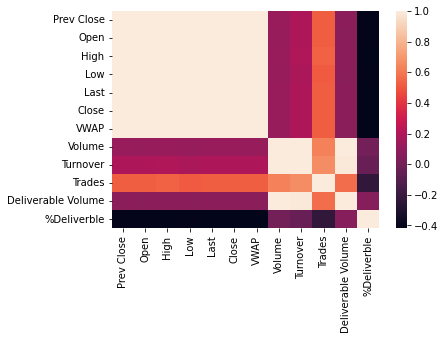

In [1314]:
sn.heatmap(df.corr())

In [1315]:
df=df.asfreq('B')
df.index

DatetimeIndex(['2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=1305, freq='B')

In [1316]:
df=df.ffill(axis=0)
df['Prev Close'].isnull().values.any()

False

In [1317]:
Ntest=math.trunc(0.3*len(df))
train=df.iloc[:-Ntest,3]
test=df.iloc[-Ntest:,3]

In [1318]:
Decomp_results=seasonal_decompose(df['Prev Close'])

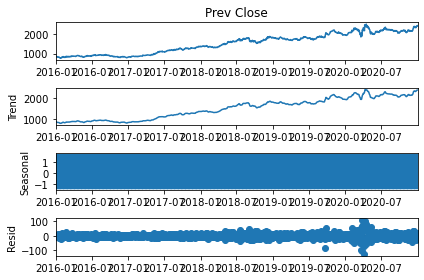

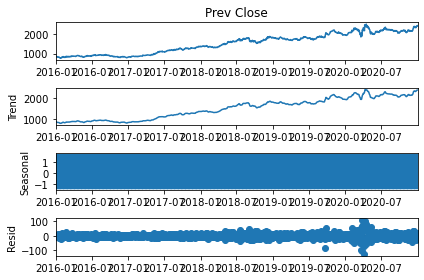

In [1319]:
Decomp_results.plot()

In [1320]:
exo=df.iloc[:,:11]
exo_train=exo.iloc[:-Ntest]
exo_test=exo.iloc[-Ntest:]


In [1321]:
exo=exo.asfreq('B')
exo.ffill()
exo=np.nan_to_num(exo)

In [1322]:
auto_arima(df['Prev Close'],exogenous=exo,m=1,trace=True,D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4450.795, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3741.151, Time=0.97 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4079.221, Time=1.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4406.299, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4307.691, Time=0.84 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4459.497, Time=1.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-4467.612, Time=1.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-4460.430, Time=1.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4417.474, Time=1.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-4461.598, Time=1.32 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-4469.624, Time=1.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-4408.299, Time=0.93 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-4461.497, Time=1.06 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-4462.447, Time=1.15 sec
 ARIMA(1,1,1)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1305
Model:               SARIMAX(0, 1, 2)   Log Likelihood                2248.812
Date:                Sun, 25 Sep 2022   AIC                          -4469.624
Time:                        12:02:15   BIC                          -4397.200
Sample:                             0   HQIC                         -4442.455
                               - 1305                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   2.43e-34   4.12e+33      0.000       1.000       1.000
x2         -1.318e-16   3.13e-34  -4.21e+17      0.000   -1.32e-16   -1.32e-16
x3          -2.22e-16   2.73e-34  -8.14e+17      0.000   -2.22e-16   -2.22e-16
x4         -3.053e-16   2.87e-34  -1.06e+18      0.000   -3.05e-16   -3.05e-16
x5         -1.943e-16   2.06e-34  -9.42e+17      0.000   -1.94e-16   -1.94e-16
x6         -2.498e-16   2.12e-34  -1.18e+18      0.000    -2.5e-16    -2.5e-16
x7         -2.776e-17    3.1e-34  -8.94e+16      0.000   -2.78e-17   -2.78e-17
x8          1.849e-17   2.06e-28   8.96e+10      0.000    1.85e-17    1.85e-17
x9         -4.244e-17   3.95e-20  -1075.240      0.000   -4.25e-17   -4.24e-17
x10         1.897e-17   8.18e-31   2.32e+13      0.000     1.9e-17     1.9e-17
x11         5.452e-18   1.58e-28   3.46e+10      0.000    5.45e-18    5.45e-18
ma.L1         -0.7994   7.57e-39  -1.06e+38      0.000      -0.799      -0.799
ma.L2         -0.0479   3.77e-39  -1.27e+37      0.000      -0.048      -0.048
sigma2         0.0020   4.21e-34   4.73e+30      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   6.96   Jarque-Bera (JB):          56432516.07
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):             574.34   Skew:                            30.00
Prob(H) (two-sided):                  0.00   Kurtosis:                      1020.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.81e+53. Standard errors may be unstable.
"""

# ARIMAX

In [1323]:
model_arimax=ARIMA(train,exog=exo_train,order=(0,1,2))

Model_arimax=model_arimax.fit()

Model_arimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.Low   No. Observations:                  913
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -3364.153
Method:                       css-mle   S.D. of innovations             23.526
Date:                Sun, 25 Sep 2022   AIC                           6758.305
Time:                        12:03:21   BIC                           6830.556
Sample:                    01-04-2016   HQIC                          6785.887
                         - 07-03-2019                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0010      1.359      0.001      0.999      -2.662       2.664
Prev Close            -0.9192      0.054    -16.921      0.000      -1.026      -0.813
Open                   0.1090      0.064      1.715      0.086      -0.016       0.234
High                  -0.0293      0.083     -0.353      0.724      -0.192       0.133
Low                    0.7463      0.121      6.161      0.000       0.509       0.984
Last                  -0.1506      0.120     -1.259      0.208      -0.385       0.084
Close                  0.1793      0.156      1.147      0.251      -0.127       0.486
VWAP                   0.0721      0.133      0.542      0.588      -0.189       0.333
Volume              1.594e-06   1.36e-06      1.171      0.241   -1.07e-06    4.26e-06
Turnover           -1.115e-14        nan        nan        nan         nan         nan
Trades              2.314e-05   1.85e-06     12.513      0.000    1.95e-05    2.68e-05
Deliverable Volume  -1.42e-06   1.85e-06     -0.768      0.442   -5.05e-06     2.2e-06
ma.L1.D.Low            0.0083      0.098      0.085      0.932      -0.184       0.201
ma.L2.D.Low            0.0601      0.034      1.765      0.078      -0.007       0.127
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.0694           -4.0774j            4.0780           -0.2527
MA.2           -0.0694           +4.0774j            4.0780            0.2527
-----------------------------------------------------------------------------
"""

# SARIMAX

In [1324]:
model_sarimax=SARIMAX(train,exog=exo_train,order=(0,1,2),seasonal_order=(0,0,0,0) )

Model_sarimax=model_sarimax.fit()

Model_sarimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Low   No. Observations:                  914
Model:               SARIMAX(0, 1, 2)   Log Likelihood                4816.439
Date:                Sun, 25 Sep 2022   AIC                          -9604.878
Time:                        12:03:23   BIC                          -9537.443
Sample:                    01-01-2016   HQIC                         -9579.135
                         - 07-03-2019                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Prev Close         -7.542e-14   1.75e-33  -4.31e+19      0.000   -7.54e-14   -7.54e-14
Open                3.114e-13   2.43e-33   1.28e+20      0.000    3.11e-13    3.11e-13
High               -9.003e-13   2.31e-33   -3.9e+20      0.000      -9e-13      -9e-13
Low                    1.0000   1.06e-33   9.44e+32      0.000       1.000       1.000
Last                8.317e-14   6.84e-34   1.22e+20      0.000    8.32e-14    8.32e-14
Close               2.828e-14   1.08e-33   2.62e+19      0.000    2.83e-14    2.83e-14
VWAP               -2.859e-15   3.23e-34  -8.86e+18      0.000   -2.86e-15   -2.86e-15
Volume               1.05e-16   8.68e-28   1.21e+11      0.000    1.05e-16    1.05e-16
Turnover            -1.44e-17   9.43e-20   -152.715      0.000   -1.46e-17   -1.42e-17
Trades              1.274e-18   1.03e-29   1.24e+11      0.000    1.27e-18    1.27e-18
Deliverable Volume  -7.24e-17   6.07e-28  -1.19e+11      0.000   -7.24e-17   -7.24e-17
ma.L1                 -0.6158   2.29e-38  -2.69e+37      0.000      -0.616      -0.616
ma.L2                 -0.1005   5.45e-39  -1.84e+37      0.000      -0.101      -0.101
sigma2              1.589e-06   4.11e-31   3.87e+24      0.000    1.59e-06    1.59e-06
===================================================================================
Ljung-Box (L1) (Q):                   1.28   Jarque-Bera (JB):             24300.79
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               2.12   Skew:                             3.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.02e+53. Standard errors may be unstable.
"""

# Prediction

In [1325]:
start_len=len(train)
end_len=len(train)+len(test)-1

In [1326]:
pred_arimax=Model_arimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

In [1327]:
pred_sarimax=Model_sarimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

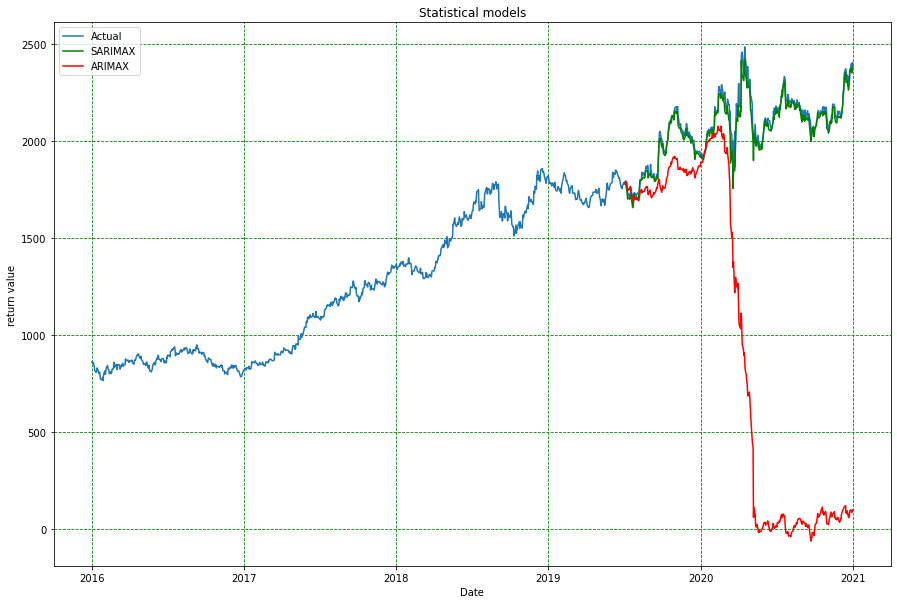

In [1328]:
plt.figure(figsize=(15,10))
plt.plot(df['Prev Close'],label='Actual')
plt.plot(pred_sarimax,label='SARIMAX',color='green')
plt.plot(pred_arimax,label='ARIMAX',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

In [1329]:
len(pred_arimax)
test=df['Prev Close'].iloc[-len(pred_arimax):]

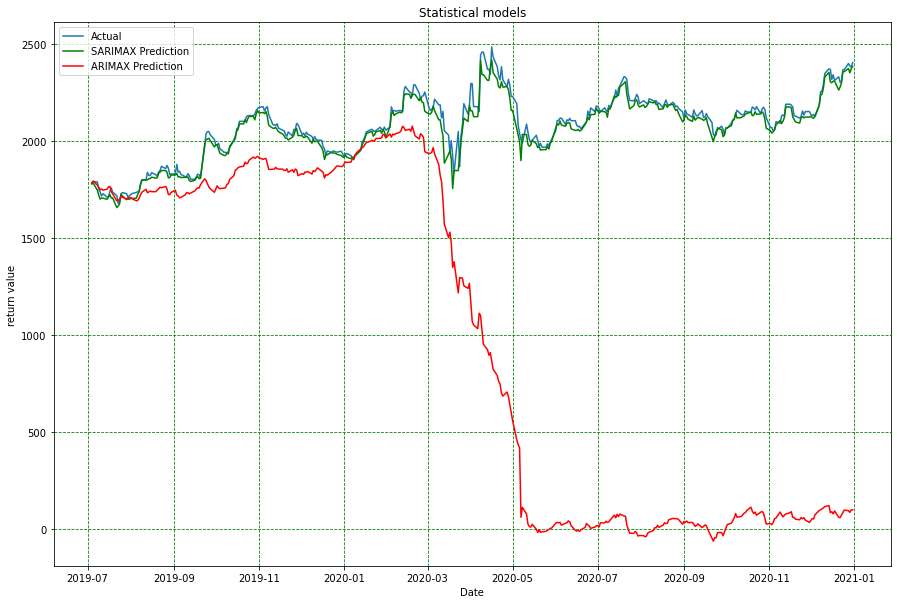

In [1330]:
plt.figure(figsize=(15,10))
plt.plot(test,label='Actual')
plt.plot(pred_sarimax,label='SARIMAX Prediction',color='green')
plt.plot(pred_arimax,label='ARIMAX Prediction',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

# Evaluation

    ARIMAX

In [1331]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_arimax))
print(rmse)

1464.354965878685


In [1332]:
error=mean_absolute_error(test,pred_arimax)
print(error)

1110.3728622074495


In [1333]:
r2_score(test,pred_arimax)

-78.57020267119562

    SARIMAX

In [1334]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_sarimax))
print(rmse)

37.243179915075196


In [1335]:
error=mean_absolute_error(test,pred_sarimax)
print(error)

25.91647041683626


In [1336]:
r2_score(test,pred_sarimax)

0.9485303463648814